In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA ANALYSIS


In [2]:
df = pd.read_csv('data.csv')
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df[['Invoice_Date', 'Invoice_time']] = df['InvoiceDate'].str.split(' ', expand=True)


In [5]:
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'], format = '%d/%m/%Y')


In [6]:
df = df.drop(columns=['InvoiceDate', 'Invoice_time'])

In [7]:
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
UnitPrice            0
CustomerID      135080
Country              0
Invoice_Date         0
dtype: int64

In [8]:
na_count_by_country = df['CustomerID'].isna().groupby(df['Country']).sum().astype(int)
na_count_by_country[na_count_by_country > 0]


# df[df['CustomerID'].isna()]

Country
Bahrain                2
EIRE                 711
France                66
Hong Kong            288
Israel                47
Portugal              39
Switzerland          125
United Kingdom    133600
Unspecified          202
Name: CustomerID, dtype: int32

### Add Revenue column

In [9]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [10]:
df = df[df['Quantity'] > 0]

# CUSTOMER SEGMENTATION AND PROFILING

In [11]:
product_quant = df.groupby('Description')['Quantity'].sum()
product_revenue = df.groupby('Description')['TotalPrice'].sum()

top_10_products_qty = product_quant.nlargest(10).reset_index()
top_10_products_rev = product_revenue.nlargest(10).reset_index()




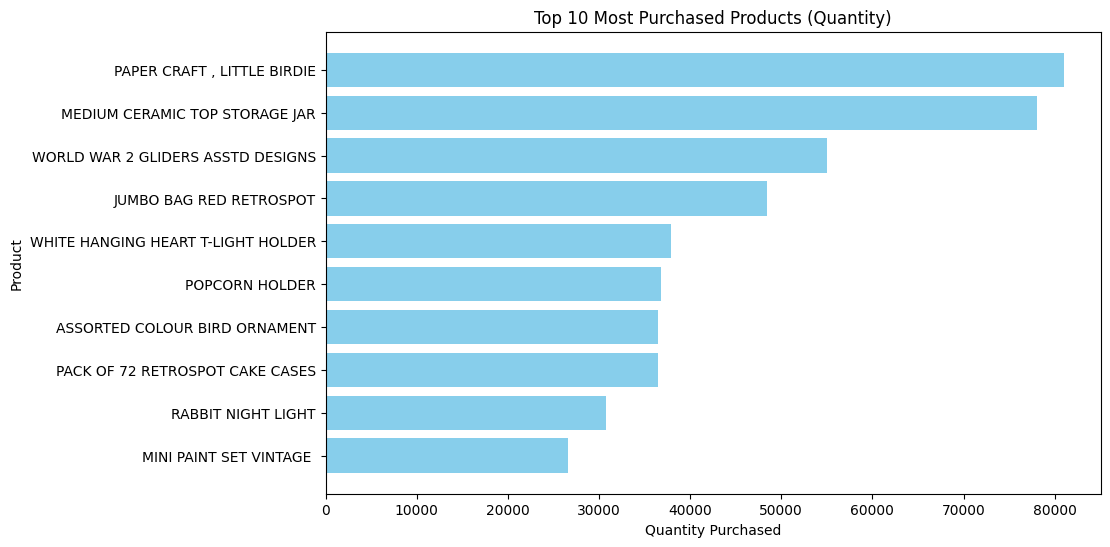

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_products_qty['Description'], top_10_products_qty['Quantity'], color='skyblue')
plt.xlabel('Quantity Purchased')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Purchased Products (Quantity)')

plt.show()

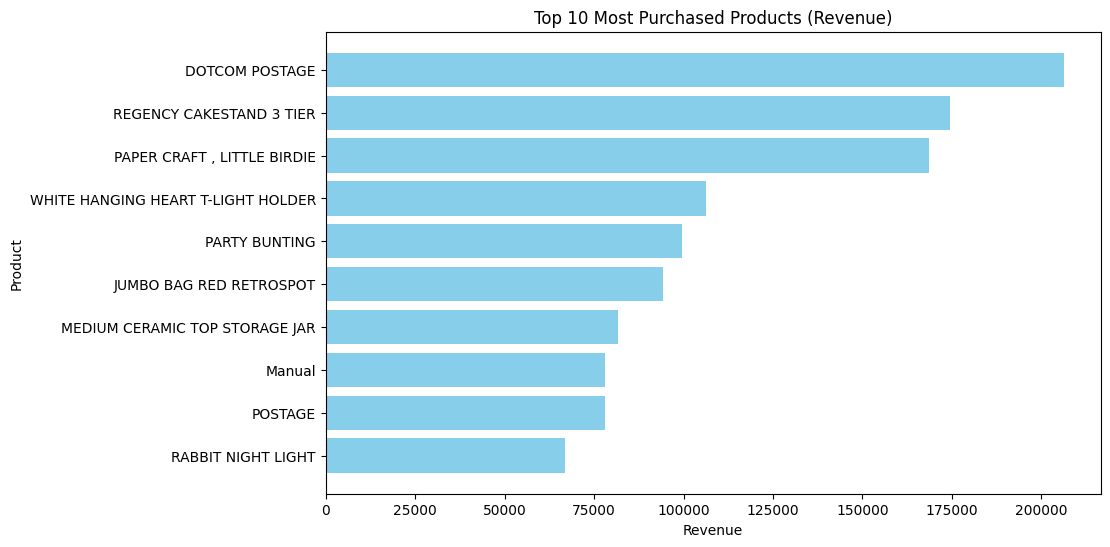

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_products_rev['Description'], top_10_products_rev['TotalPrice'], color='skyblue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Purchased Products (Revenue)')

plt.show()

In [14]:
country_revenue = df.groupby('Country')['TotalPrice'].sum()
top_10_country = country_revenue.nlargest(10).reset_index()


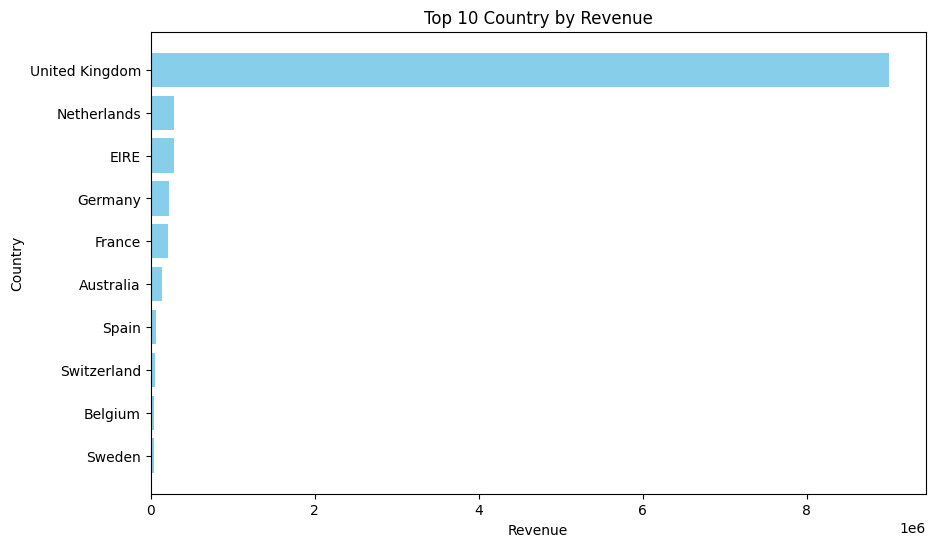

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_country['Country'], top_10_country['TotalPrice'], color='skyblue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.gca().invert_yaxis()
plt.title('Top 10 Country by Revenue')

plt.show()

### Number of customers by Country

In [16]:
customer_country = df.groupby('Country')['CustomerID'].count()
customer = customer_country.nlargest(10).reset_index()
customer

,Country,CustomerID
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,20.34


### High spending customers

In [18]:
customers_count = df.groupby('CustomerID')['TotalPrice'].sum()
top_10_customer = customers_count.nlargest(10).reset_index()
top_10_customer

,CustomerID,TotalPrice
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
5,12415.0,124914.53
6,14156.0,117379.63
7,17511.0,91062.38
8,16029.0,81024.84
9,12346.0,77183.60


<Axes: xlabel='TotalPrice', ylabel='Quantity'>

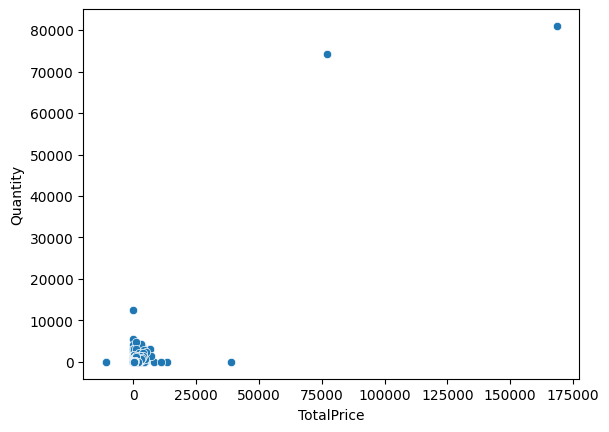

In [19]:
sns.scatterplot(data=df, x = 'TotalPrice', y = 'Quantity')

# TIME SERIES ANALYSIS

In [20]:
df['Month'] = df['Invoice_Date'].dt.strftime('%b')
df['Year'] = df['Invoice_Date'].dt.strftime('%Y')
df['Month Year'] = df['Invoice_Date'].dt.strftime('%b %Y')

df['Month Year'] = pd.to_datetime(df['Month Year'])



C:\Users\chiranjeev.ujoodha\AppData\Local\Temp\ipykernel_48880\3727652848.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month Year'] = pd.to_datetime(df['Month Year'])


In [21]:
monthly_revenue = df.groupby('Month Year')['TotalPrice'].sum().reset_index()

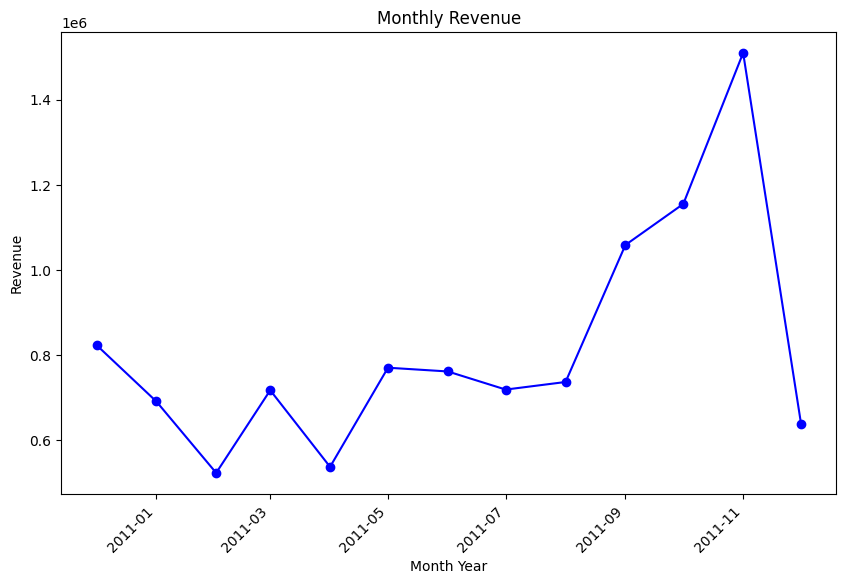

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month Year'], monthly_revenue['TotalPrice'], marker='o', linestyle='-', color='b')
plt.xlabel('Month Year')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

# LINEAR REGRESSION


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
df_ml = df[['Invoice_Date','TotalPrice']]
df_ml.head()


,Invoice_Date,TotalPrice
0,2010-12-01,15.30
1,2010-12-01,20.34
2,2010-12-01,22.00
3,2010-12-01,20.34
4,2010-12-01,20.34


In [47]:
df_ml['Invoice_Date_Num'] = (df_ml['Invoice_Date'] - df_ml['Invoice_Date'].min()).dt.days
df_ml

C:\Users\chiranjeev.ujoodha\AppData\Local\Temp\ipykernel_48880\504382265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Invoice_Date_Num'] = (df_ml['Invoice_Date'] - df_ml['Invoice_Date'].min()).dt.days


,Invoice_Date,TotalPrice,Invoice_Date_Num
0,2010-12-01,15.30,0
1,2010-12-01,20.34,0
2,2010-12-01,22.00,0
3,2010-12-01,20.34,0
4,2010-12-01,20.34,0
...,...,...,...
541904,2011-12-09,10.20,373
541905,2011-12-09,12.60,373
541906,2011-12-09,16.60,373
541907,2011-12-09,16.60,373


In [48]:
X = df_ml[['Invoice_Date_Num']]
y = df_ml[['TotalPrice']]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
print(X_train.shape)
print(X_test.shape)

(425028, 1)
(106257, 1)


In [57]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)



Mean Squared Error: 4235.825403538422


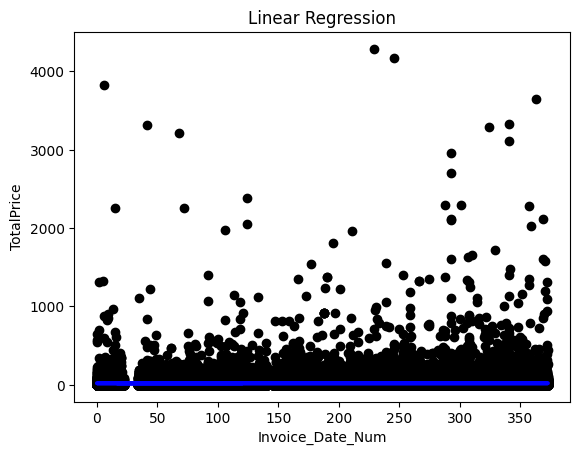

In [52]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Invoice_Date_Num')
plt.ylabel('TotalPrice')
plt.title('Linear Regression')
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

c:\Users\chiranjeev.ujoodha\Desktop\Bootcamp\Python-Bootcamp\env\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Mean Squared Error: 4277.969843552624


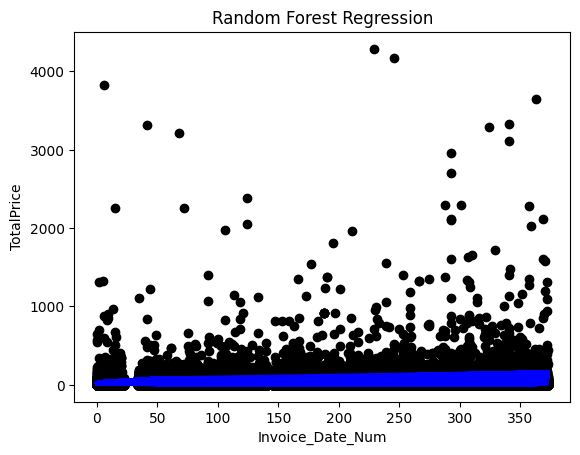

In [56]:
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Invoice_Date_Num')
plt.ylabel('TotalPrice')
plt.title('Random Forest Regression')
plt.show()